# Importing Required Modules for Analysis

In [76]:
from importlib import reload 
# module to read raw data
import src.data.data_reading as dr
reload(dr)

# module to clean data 
import src.scripts.data_cleaning as dc
reload(dc)

# module for data wrangling 
import src.utils.data_wrangling as dw
reload(dw)

import matplotlib.pyplot as plt


In [12]:
characters_df, movies_df, plots_df = dr.read_datas()

# Data Cleaning

## Movies Dataset
1. **Processed Columns:**
   - **`genres`, `languages`, `country`:** Extracted descriptive names from Freebase ID mappings, joining multiple entries with commas for readability.
   - **`freebase_id`:** Removed as it was redundant for analysis.

2. **Added the `plot` Column:**
   - Merged plot summaries from an external dataset using `wiki_id` as the common key.

In [30]:
movies_clean_df = dc.clean_movies_df(movies_df, plots_df)
movies_clean_df

,name,release_date,revenue,runtime,languages,country,genres,plot
wiki_id,,,,,,,,
330,Actrius,1996.0,NaN,90.0,"Catalan , Spanish",Spain,"Drama, Comedy-drama",In order to prepare the role of an important o...
3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
3746,Blade Runner,1982.0,33139618.0,116.0,"Japanese , Cantonese, English , German , Hunga...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
3837,Blazing Saddles,1974.0,119500000.0,93.0,"Yiddish , English",United States of America,"Western, Satire, Comedy","In the American Old West of 1874, construction..."
...,...,...,...,...,...,...,...,...
37473592,Thoppul Kodi,2011.0,NaN,145.0,None,None,Drama,Thoppul kodihttp://qualitymp3.blogspot.in/2011...
37476824,I Love New Year,2011.0,NaN,NaN,Hindi,India,"Crime Fiction, Caper story, Crime Comedy, Comedy",NaN
37478048,Mr. Bechara,1996.0,NaN,NaN,Hindi,None,Comedy film,"Anand Verma, a widower and father of a child, ..."


### Missing Data Analysis

The following table shows the missing data in each column of the movie dataset (`movies_clean_df`):

In [ ]:
dc.missing_movies_data_check(movies_clean_df)

99 out of 81840 movies have no name data, which means 0.12096774193548387% of the data is missing
7001 out of 81840 movies have no release_date data, which means 8.554496578690127% of the data is missing
73439 out of 81840 movies have no revenue data, which means 89.73484848484848% of the data is missing
20549 out of 81840 movies have no runtime data, which means 25.108748778103617% of the data is missing
13965 out of 81840 movies have no languages data, which means 17.063782991202345% of the data is missing
8253 out of 81840 movies have no country data, which means 10.084310850439882% of the data is missing
2393 out of 81840 movies have no genres data, which means 2.9239980449657867% of the data is missing
39537 out of 81840 movies have no plot data, which means 48.31011730205279% of the data is missing


## Characters Dataframe

- **Removed irrelevant columns:** Columns like `freebase_movie_id`, `freebase_character_map_id`, `freebase_character_id`, and `movie_release_date` were removed as they did not contribute directly to the analysis.

In [ ]:
characters_clean_df = dc.clean_characters_df(characters_df)
characters_clean_df

,movie_wiki_id,character_name,birth,gender,height,ethnicity,name,release_age,freebase_actor_id
0,975900,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/03wcfv7
1,975900,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0346l4
2,975900,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/01vw26l
3,975900,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/034hyc
4,975900,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/01y9xg
...,...,...,...,...,...,...,...,...,...
450664,913762,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0b_vcv
450665,913762,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0bx7_j
450666,28308153,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/022g44
450667,28308153,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmm


### Missing Data Analysis

The following table shows the missing data in each column of the movie dataset (`movies_clean_df`):

In [ ]:
dc.missing_characters_data_check(characters_clean_df)

0 out of 450669 characters have no movie_wiki_id data, which means 0.0% of the data is missing
257875 out of 450669 characters have no character_name data, which means 57.22048776374679% of the data is missing
106145 out of 450669 characters have no birth data, which means 23.552762670607475% of the data is missing
45609 out of 450669 characters have no gender data, which means 10.120287838746398% of the data is missing
295845 out of 450669 characters have no height data, which means 65.64573999986688% of the data is missing
344611 out of 450669 characters have no ethnicity data, which means 76.46654196317031% of the data is missing
1228 out of 450669 characters have no name data, which means 0.2724837963117055% of the data is missing
158113 out of 450669 characters have no release_age data, which means 35.08406391387027% of the data is missing
815 out of 450669 characters have no freebase_actor_id data, which means 0.1808422589528013% of the data is missing


If further analysis outside of the current notebook is needed the clean dataframes are saved

In [ ]:
dc.save_cleaned_datas(movies_clean_df, characters_clean_df)

# Data Wrangling

## Distribution of number of film realized by country
 - This code processes the dataset by filtering out movies with missing country and plot data, excluding collaborative films, counting the number of movies released by each country, applying a cutoff for countries with fewer than 100 movies, and visualizing the distribution of movie releases per country with a bar plot.

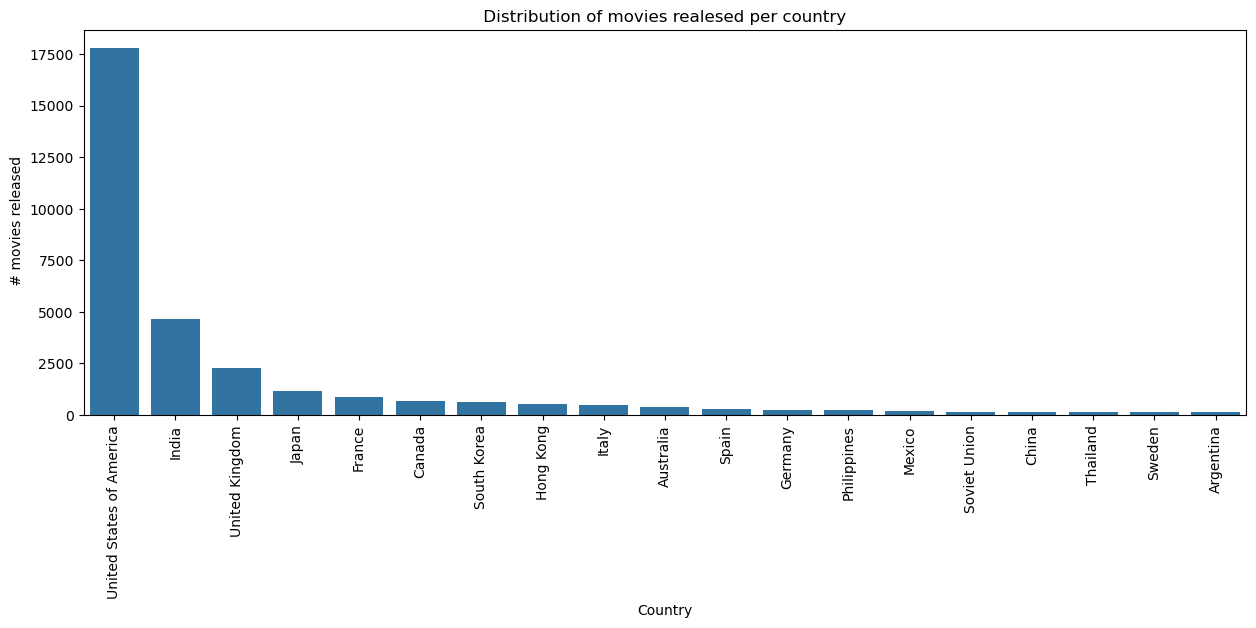

In [ ]:
dist_per_country1_df=dw.distributiion_per_country(movies_clean_df)

## Distribution of number of film realized by USA, Soviet Union and Russia

- The following plots allowed us to refute the proposal to compare American films with those of the Soviet bloc before and Russia after so as to see how the Soviet collapse affected the film industry of the two countries. The reason was the lack of data concerning soviet and russian movies.
- Here below we describe the content of the two bar plots:

Graph 1: The dataset has been filtered to include only movies from the USA, Soviet Union, and Russia, in order to make a plot of the movies release by these countries only.

Graph 2 : The code removes rows with missing values in the `release_date` column, converts the column to an integer type, and then plots the distribution of movies released over time for the USA, Soviet Union, and Russia.

### Graph 1

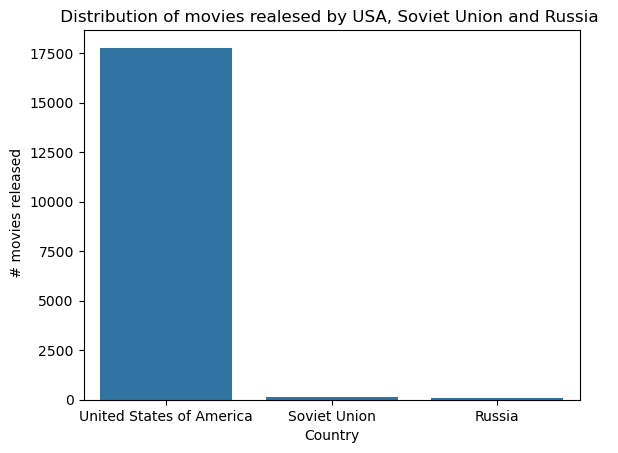

In [ ]:
dist_per_sub_country1_df = dw.distributiion_per_sub_country(dist_per_country1_df)

<a id='second_graph'></a>

### Graph 2

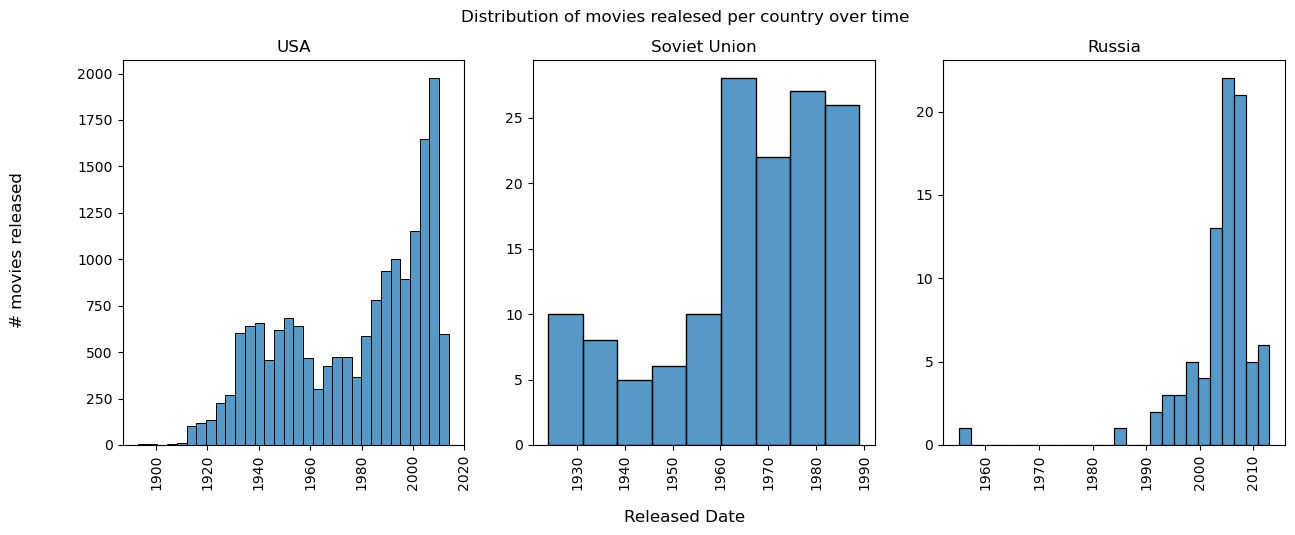

In [ ]:
dist_per_country1_date_df = dw.filter_date(dist_per_sub_country1_df)

fig = plt.figure(figsize=(15, 5))
fig.suptitle('Distribution of movies realesed per country over time')
fig.supylabel('# Movies Released', x = 0.05)
fig.supxlabel('Released Date', y = -0.05)
plt.subplot(1,3,1)
#plot distribution of movies released by USA over time
dw.plot_USA_date_distribution(dist_per_country1_date_df)

plt.subplot(1,3,2)
#plot distribution of movies released by Soviet Union over time
dw.plot_Soviet_date_distribution(dist_per_country1_date_df)

plt.subplot(1,3,3)
#plot distribution of movies released by Russia over time
dw.plot_Russia_date_distribution(dist_per_country1_date_df)



## Analysis per Region

The next step will consider the distribution of movies per macro region of the world.

In order to do that, the following steps have been executed:

- Define the regions and the countries contained in it as a List
- Create a function that tells in which region a country belongs to
- Apply this function to column "country" and store result in a new column: "region"


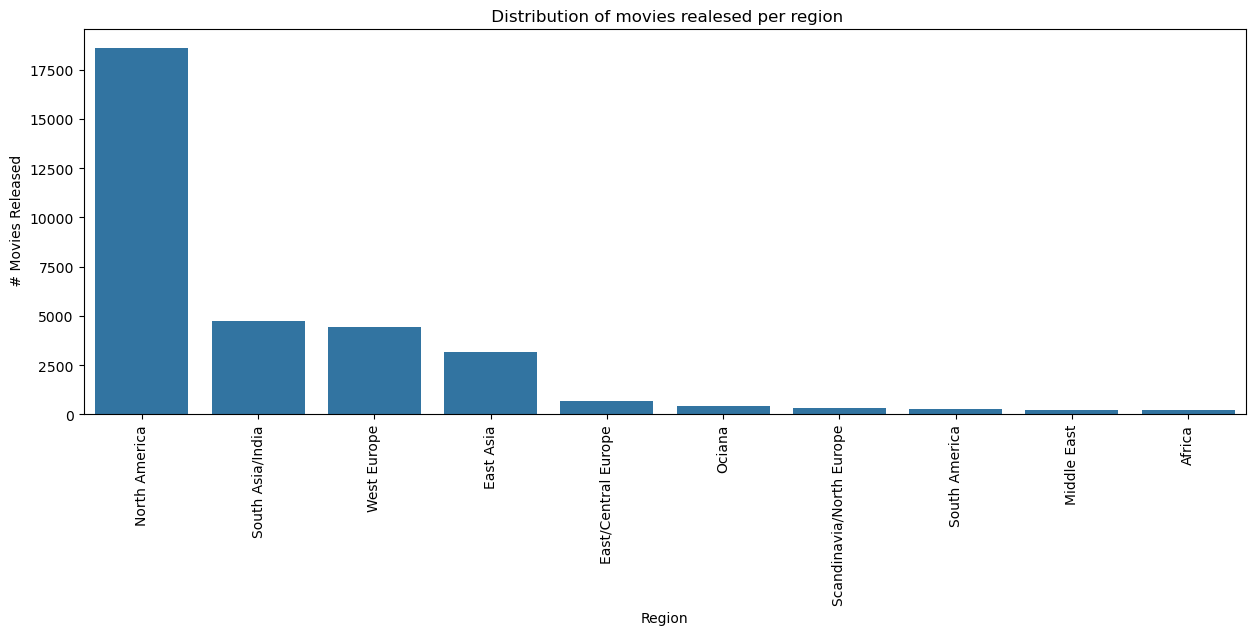

In [ ]:
dist_per_region_df =dw.add_region_column(dist_per_country1_df)

# distribution of number of film realized by region
dw.plot_distribution_per_region(dist_per_region_df)

Since the project focuses on the relation between historical events and their depiction in movies, let's consider the movies on a time axis.

Due to a low number of movies realesed, Oceania, South America, Middle East and Africa regions have been omitted from this analysis.

To plot the remaining regions, for each of them a filter has been applied to the dataset **dist_per_region_df**  in order to consider only the chosen regions and the result is obtained by using the method `sns.histplot(...)` and selecting the column **released_date**.

c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


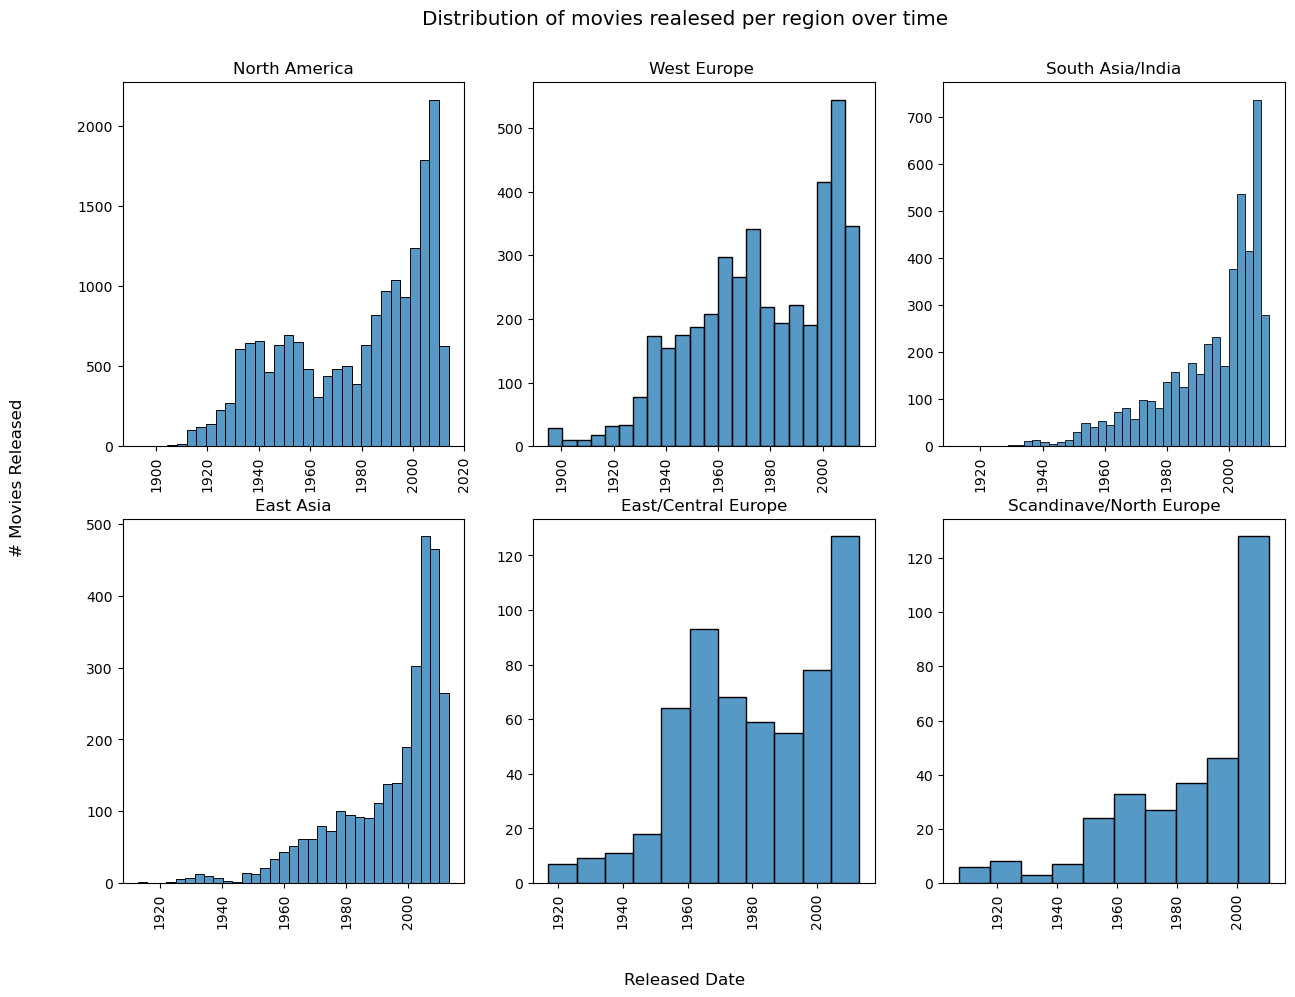

In [ ]:

dist_per_region_date_df = dw.filter_date(dist_per_region_df)


fig = plt.figure(figsize=(15, 10.4))
fig.suptitle('Distribution of movies realesed per region over time', size = 'x-large', y =0.95)
fig.supylabel('# Movies Released', x = 0.05)
fig.supxlabel('Released Date')

plt.subplot(2,3,1)
#North America: distribution of film realized over time
dw.north_america_plot(dist_per_region_date_df)

plt.subplot(2,3,2)
#West Europe: distribution of film realized over time
dw.west_europe_plot(dist_per_region_date_df)

plt.subplot(2,3,3)
#South Asia/India: distribution of film realized over time
dw.south_asia_india_plot(dist_per_region_date_df)

plt.subplot(2,3,4)
#East Asia: distribution of film realized over time
dw.east_asia_plot(dist_per_region_date_df)

plt.subplot(2,3,5)
# East/Central Europe: distribution of film realized over time
dw.east_central_europe_plot(dist_per_region_date_df)


plt.subplot(2,3,6)
# Scandinavia/North Europe: distribution of film realized over time 
dw.scandinave_north_europe_plot(dist_per_region_date_df)





## Collaboration movies

So far, only films made solely by one country have been analysed. However, it would also be interesting to see how movies that have been created by a collaboration of different countries have evolved over time to see if historical events had an impact.

To begin with, let's see if the number of films resulting from the collaboration between countries is large enough to conduct an analysis. Since the entries of columns **country** are just `string` data types, the method `str.split(...)` to convert the `string` into a `List` of strings. Afterwards since the order in the list is not relevant, a conversion of the `List` into `Set` is applied. Finally, the length of each **country** entry is counted and the dataframe is filtered, keeping only those films whose length is greater than 1. So the total number of films created by a collaboration of several countries is given by the length of the final dataframe.

In [ ]:
collaboration_movies_df = dw.filter_collaboration(movies_clean_df)

Number of movies made by more than one country: 9218


Let's focus on collaborations with the United States and look at the distribution of countries that have collaborated with it. To achieve this, here are the main steps :
- Filter dataframe to get only movies that show a collaboration with USA
- Remove USA from the Set 
- Use `explode(...)` method to split and duplicate movies that have several contributors
- Use `values_count(...)` method to get the distribution 


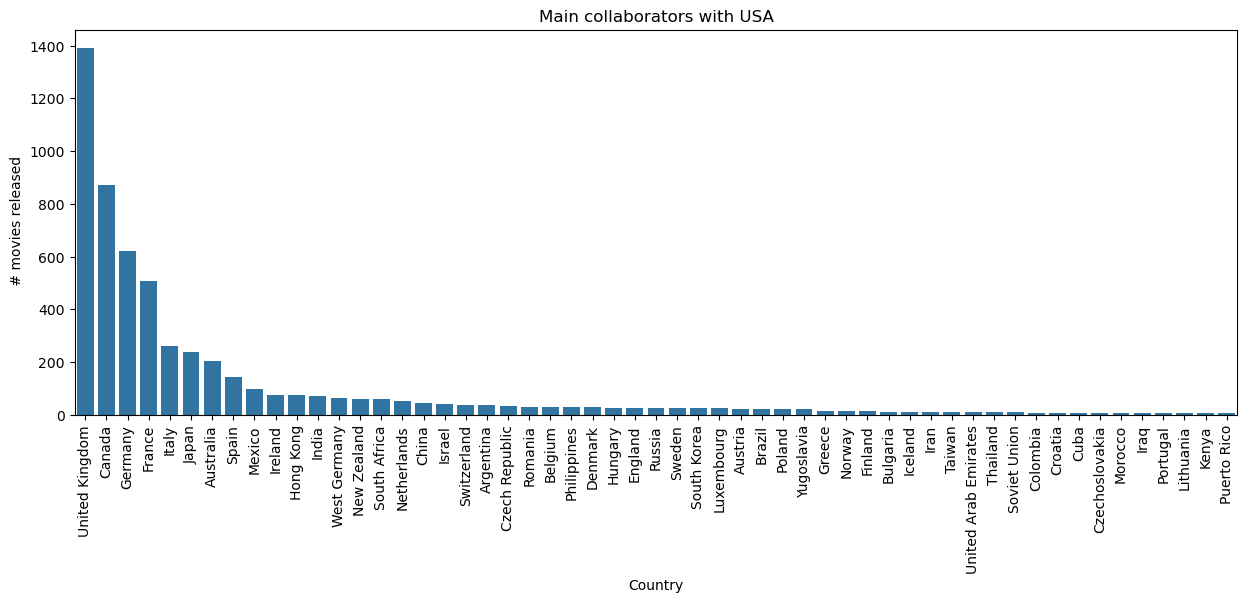

In [ ]:
collaborationUSA_movies_df = dw.filter_collaboration_USA(collaboration_movies_df)

As in the previous section, one can analyse this distribution by considering also time ! To achieve this, the idea is the following.

- Remove movies that have no **released_date** 
- Compute crosstable with `crosstab(...)` method *
- Create an empty dataframe with the same index and column label, but with the missing dates added. 
- Apply `combine_first(...)` to combine both datasets
- Create a function to group the data by period and keep only a restricted number of countries.

\* However by doing only this, the obtaining dataframe will be of the shape [110 x 104] which is not readable. Furthermore, the date columns is not continuous (in year). To solve these two problems

In [ ]:
collab_date_df = dw.collab_USA_over_time(collaborationUSA_movies_df)

merge_collab_date_df = dw.merge_dates_column(collab_date_df)
merge_collab_date_df


c:\Users\ismae\OneDrive\Documents\EPFL\MA3\ADA\P2\ada-2024-project-spaghettisolution\src\utils\data_wrangling.py:287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


release_date,[1910 - 1919],[1920 - 1929],[1930 - 1939],[1940 - 1949],[1950 - 1959],[1960 - 1969],[1970 - 1979],[1980 - 1989],[1990 - 1999],[2000 - 2009],[2010 - 2013]
collaboration,,,,,,,,,,,
Canada,1,0,3,3,4,10,29,101,155,469,75
China,0,0,0,0,0,0,0,3,3,26,10
England,0,1,0,1,1,2,2,3,6,8,3
France,1,2,1,6,12,33,21,39,130,200,53
German Democratic Republic,0,0,0,0,0,0,0,0,1,0,0
Germany,0,1,4,1,2,4,10,18,109,432,34
Hong Kong,0,0,0,0,0,1,10,14,10,30,9
India,0,0,0,0,1,1,2,1,6,39,20
Iraq,0,0,0,0,0,0,0,0,0,7,0


The heatmap corresponding to the dataframe is as follows. The colour scale has been normalized by column (i.e. by country) to make it easier to see variations per year.

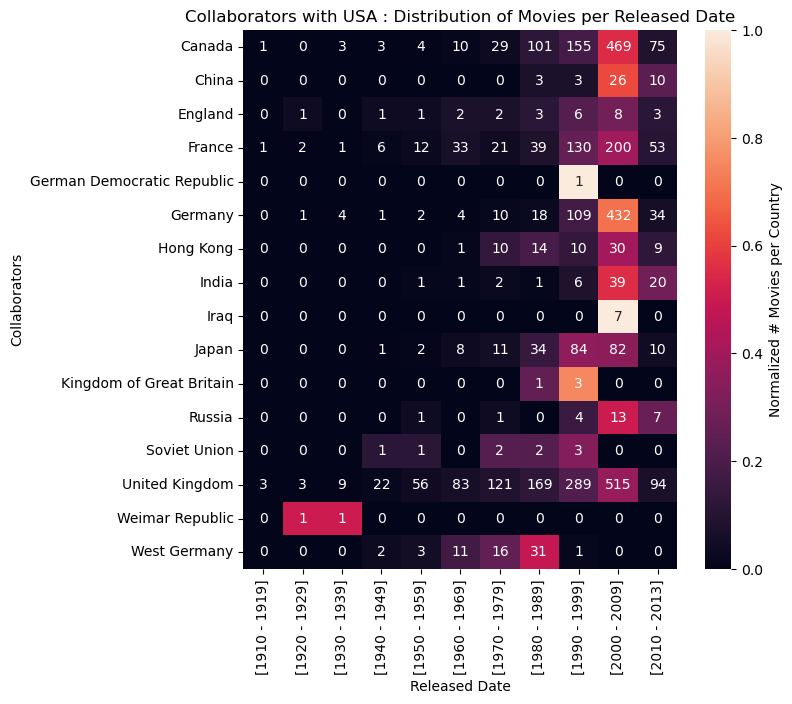

In [ ]:
dw.normelize_collab_USA_heatmap(merge_collab_date_df)